We want to construct the OPs inside a region $\Omega$ bounded by a cubic:

$$
\Omega = \left\lbrace (x,y) \: : \: y^2 \leq \phi(x) = (1 - x^2)(b - x), \qquad x \in [-1, 1], \qquad b > 1\right\rbrace.
$$

Let $p_{n,k}(\tau), 0 \leq k \leq n$ denote an orthonormal semiclassical OP of degree $n$ on $[0, 1]$ that is orthogonal wrt the weight

$$
 \tau^{k+1/2}(1-\tau)^{k+1/2}\left((b+1)/2 - \tau\right)^{k+1/2},
$$

and let $q_k(t)$ denote an orthonormal classical OP of degree $k$ that is orthogonal wrt an even weight $w(t)$ on $[-1, 1]$, then the polynomials

$$
P_{n,k}(x,y) :=\frac{1}{2^{5/4+3k/2}}p_{n-k,k}\left(\frac{x+1}{2}\right)\sqrt{\phi(x)}^k\,q_k\left(\frac{y}{\sqrt{\phi}} \right)
$$

are orthonormal wrt the following inner product 

$$
\langle f, g \rangle = \int_{\Omega}f(x,y)g(x,y)W(x,y)\mathrm{d}x\mathrm{d}y, \qquad W(x,y) = w\left( \frac{y}{\sqrt{\phi(x)}}  \right)
$$

Proof: making the change variables $y = t\sqrt{\phi(x)} = t\left[(1-x^2)(b-x)  \right]^{1/2}$ and $x = 2\tau - 1$ 

\begin{align*}
\langle P_{n,k}, P_{m,j} \rangle & = \frac{1}{2^{5/2+3(k+j)/2}}\int_{-1}^1\int_{-\sqrt{\phi}}^{{\sqrt{\phi}} } 
p_{n-k,k}p_{m-j,j}\left[(1-x^2)(b-x) \right]^{(k+j)/2}\,q_kq_jw\left( \frac{y}{\sqrt{\phi(x)}}  \right)\mathrm{d}x\mathrm{d}y \\
& = \frac{1}{2^{5/2+3(k+j)/2}}\int_{-1}^1\int_{-1}^{1} 
p_{n-k,k}p_{m-j,j}\left[(1-x^2)(b-x) \right]^{(k+j)/2+1/2}\,q_kq_jw\left( t\right)\mathrm{d}x\mathrm{d}t \\
& =  \frac{1}{2^{5/2+3(k+j)/2}}\int_{-1}^1p_{n-k,k}p_{m-j,j}\left[(1-x^2)(b-x) \right]^{(k+j)/2+1/2}\,\mathrm{d}x\int_{-1}^{1} 
q_kq_jw\left( t\right)\mathrm{d}t \\
& = \frac{2^{3/2+3(k+j)/2+1}}{2^{5/2+3(k+j)/2}}\int_{0}^1 p_{n-k,k}p_{m-j,j}\left[\tau(1 - \tau)((b+1)/2-\tau) \right]^{(k+j)/2+1/2}\,\mathrm{d}\tau\int_{-1}^{1} 
q_kq_jw\left( t\right)\mathrm{d}t \\
& = \delta_{n,m}\delta_{k,j}
\end{align*}

Without BigFloats, we can only generate the normalized semiclassical OPs $p_{n,k}$ for $k \leq k_{\max} = 23$:

In [2]:
] activate SemiClassicalOPs1;

  Activating environment at `C:\Users\mfaso\Dropbox\Imperial\Julia_Jupyter_Pluto\SemiClassicalOPs1\Project.toml`


In [21]:
using ClassicalOrthogonalPolynomials, ContinuumArrays, SemiclassicalOrthogonalPolynomials, Plots, LinearAlgebra, BlockBandedMatrices, BandedMatrices, GenericSVD, GenericLinearAlgebra, Test

In [18]:
b = 2.0
k = 24
Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))

LoadError: ArgumentError: invalid Array dimensions

In [19]:
b = BigFloat(2.0)
k = 24
Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))

Normalized(SemiclassicalJacobi with weight x^24.5 * (1-x)^24.5 * (1.5-x)^24.5)

For now, we won't use BigFloat.

The problem with the $P_{n,k}$ is that for $k \geq 2$, they have degree greater than $n$. Let $Q_{n,k}(x,y)$, $0 \leq k \leq n$ denote an orthonormal OP of degree $n$ wrt the inner product given above on the region $\Omega$ and let

$$
\mathbb{P} = \left(
\begin{array}{c}
P_{0,0} \\
\hline
P_{1,0} \\
P_{1,1} \\
\hline
\vdots
\end{array}
\right),
\qquad
\mathbb{Q} = \left(
\begin{array}{c}
Q_{0,0} \\
\hline
Q_{1,0} \\
Q_{1,1} \\
\hline
\vdots
\end{array}
\right)
$$

We will use the Lanczos procedure to construct the connection matrix $C$:

$$
\mathbb{Q} = C\mathbb{P} 
$$

$C$ is an orthogonal matrix:

$$
\mathbb{Q}(w\mathbb{Q})^{\intercal} = I = C\mathbb{P}(w\mathbb{P})^{\intercal}C^{\intercal} = CC^{\intercal}
$$

We need the operators representing multiplication of $\mathbb{P}$ by $x$ and $y$:

$$
x\mathbb{P} = X\mathbb{P}, \qquad y\mathbb{P} = Y\mathbb{P}
$$

Are there linear algebra methods other than Lanczos that we could use to compute the connection matrix? 

$X$ is block-tridiagonal with diagonal blocks because

$$
xP_{n,k} = b_{n-1,k}P_{n-1,k} + a_{n,k}P_{n,k} + b_{n,k}P_{n+1,k}
$$

and the $a_{n,k}$ and $b_{n,k}$ come from the Jacobi operators of the normalized/orthonormal semiclassical OPs $p_{n,k}$. 

Some tests to check $X$: from the definition of the $P_{n,k}$, the above simplifies to

$$
xp_{n-k,k}\left(\frac{x+1}{2}\right) = b_{n-1,k}p_{n-1-k,k}\left(\frac{x+1}{2}\right) + a_{n,k}p_{n-k,k}\left(\frac{x+1}{2}\right) + b_{n,k}p_{n+1-k,k}\left(\frac{x+1}{2}\right)
$$

In [26]:
@testset "Multiplication by x" begin
    nmax = 7
    b = 2.0
    X = XP(nmax,b)
    # evaluate Pnk at xv and yv
    xv = -0.5
    yv = 0.3
    # test a few of the k = 0 cases
    k = 0
    n = 0
    # generate the required polynomials:
    P = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    lhs = xv*P[(xv + 1)/2,n+1]
    Pnk = (n,x,y) -> P[(x + 1)/2,n+1]
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[1,1]*Pnk(0,xv,yv) + X[1,2]*Pnk(1,xv,yv)
    @test lhs ≈ rhs
    n = 3
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[7,4]*Pnk(n-1,xv,yv) + X[7,7]*Pnk(n,xv,yv) + X[7,11]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[r-nmax,r-2nmax]*Pnk(n-1,xv,yv) + X[r-nmax,r-nmax]*Pnk(n,xv,yv) + X[r-nmax,r+1]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    # test a few k = 2 cases
    k = 2
    P = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    n = 2
    Pn2 = (n,x,y) -> P[(x + 1)/2,n-2+1]
    lhs = xv*Pn2(n,xv,yv)
    rhs = X[6,6]*Pn2(n,xv,yv) + X[6,9]*Pn2(n+1,xv,yv)
    @test lhs ≈  rhs
    n = 4
    lhs = xv*Pn2(n,xv,yv)
    rhs = X[13,9]*Pn2(n-1,xv,yv) + X[13,13]*Pn2(n,xv,yv) + X[13,18]*Pn2(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = xv*Pn2(n,xv,yv)
    rhs = X[r-nmax+2,r-2nmax+2]*Pn2(n-1,xv,yv) + X[r-nmax+2,r-nmax+2]*Pn2(n,xv,yv) + X[r-nmax+2,r+3]*Pn2(n+1,xv,yv)
    @test lhs ≈ rhs;
    # test a few k = 1 cases
    k = 1
    P = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pnk = (n,x,y) -> P[(x + 1)/2,n-k+1]
    n = 1
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[3,3]*Pnk(n,xv,yv) + X[3,5]*Pnk(n+1,xv,yv)
    @test lhs ≈  rhs
    n = 3
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[8,8-n]*Pnk(n-1,xv,yv) + X[8,8]*Pnk(n,xv,yv) + X[8,8+n+1]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[r-nmax+1,r-2nmax+1]*Pnk(n-1,xv,yv) + X[r-nmax+1,r-nmax+1]*Pnk(n,xv,yv) + X[r-nmax+1,r+2]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    # Test a few k = nmax-1 cases
    k = nmax - 1
    P = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pnk = (n,x,y) -> P[(x + 1)/2,n-k+1]
    n = nmax - 1
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[r-nmax-1,r-nmax-1]*Pnk(n,xv,yv) + X[r-nmax-1,r-1]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[r-1,r-nmax-1]*Pnk(n-1,xv,yv) + X[r-1,r-1]*Pnk(n,xv,yv) + X[r-1,r+nmax]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
    # Test the k = nmax case
    k = nmax
    P = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pnk = (n,x,y) -> P[(x + 1)/2,n-k+1]
    n = nmax
    lhs = xv*Pnk(n,xv,yv)
    rhs = X[r,r]*Pnk(n,xv,yv) + X[r,r+nmax+1]*Pnk(n+1,xv,yv)
    @test lhs ≈ rhs;
end;

Test Summary:       | Pass  Total
Multiplication by x |   12     12


For the operator $Y$, we need the lowering operators of the semiclassical OPs: 

$$
p_{n,k-1} = c_{n-3,n}^{k}p_{n-3,k} + c_{n-2,n}^{k}p_{n-2,k} + c_{n-1,n}^{k}p_{n-1,k} + c_{n,n}^{k}p_{n,k}
$$

and the Jacobi operator of the classical orthonormal OPs $q_k$:

$$
tq_{k}(t) = \beta_{k-1}q_{k-1}(t) + \beta_kq_{k+1}(t)
$$

then

\begin{align*}
y P_{n,k} &= {2^{3/2}}\beta_{k-1} \left( c^{k}_{n-k,n-k} P_{n-1,k-1} + c^{k}_{n-k,n-k+1} P_{n,k-1}  + c^{k}_{n-k,n-k+2} P_{n+1,k-1}  + c^{k}_{n-k,n-k+3} P_{n+2,k-1}  \right) \\
&+ {2^{3/2}}\beta_{k} \left( c^{k+1}_{n-k-3,n-k}P_{n-2,k+1} + c^{k+1}_{n-k-2,n-k}P_{n-1,k+1}  + c^{k+1}_{n-k-1,n-k}P_{n,k+1}  + c^{k+1}_{n-k,n-k}P_{n+1,k+1}  \right)
\end{align*}

From this it follows that $Y$ is block-pentadiagonal with tridiagonal blocks.

Tests to check $Y$ in value space:

In [30]:
@testset "Multiplication by y" begin
    nmax = 7
    b = 2.0
    Y = YP(nmax,b)
    xv = -0.5
    yv = 0.3
    ϕ = x -> (1 - x^2)*(b - x)
    # Test a few of the k = 0 cases
    k = 0
    Pk = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pkp1 = Normalized(SemiclassicalJacobi((b+1)/2, k+1.5, k+1.5, k+1.5))
    Pnk = (n,x,y) -> Pk[(x + 1)/2,n-k+1]*sqrt(ϕ(x))^k*q[y/sqrt(ϕ(x)),k+1]/2^(5/4+3k/2)
    Pnkp1 = (n,x,y) -> Pkp1[(x + 1)/2,n-k]*sqrt(ϕ(x))^(k+1)*q[y/sqrt(ϕ(x)),k+2]/2^(5/4+3(k+1)/2)
    n = 0
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[1,3]*Pnkp1(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = 2
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[4,3]*Pnkp1(n-1,xv,yv) + Y[4,5]*Pnkp1(n,xv,yv) + Y[4,8]*Pnkp1(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = 3
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[7,3]*Pnkp1(n-2,xv,yv) + Y[7,5]*Pnkp1(n-1,xv,yv) + Y[7,8]*Pnkp1(n,xv,yv) + Y[7,12]*Pnkp1(n+1,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[r-nmax,r-3nmax+2]*Pnkp1(n-2,xv,yv) + Y[r-nmax,r-2nmax+1]*Pnkp1(n-1,xv,yv) + Y[r-nmax,r-nmax+1]*Pnkp1(n,xv,yv) + Y[r-nmax,r+2]*Pnkp1(n+1,xv,yv)
    @test lhs ≈ rhs;
    # Test a few of the k = 1 cases
    k = 1
    Pkm1 = Normalized(SemiclassicalJacobi((b+1)/2, k-0.5, k-0.5, k-0.5))
    Pk = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pkp1 = Normalized(SemiclassicalJacobi((b+1)/2, k+1.5, k+1.5, k+1.5))
    Pnk = (n,x,y) -> Pk[(x + 1)/2,n-k+1]*sqrt(ϕ(x))^k*q[y/sqrt(ϕ(x)),k+1]/2^(5/4+3k/2)
    Pnkp1 = (n,x,y) -> Pkp1[(x + 1)/2,n-k]*sqrt(ϕ(x))^(k+1)*q[y/sqrt(ϕ(x)),k+2]/2^(5/4+3(k+1)/2)
    Pnkm1 = (n,x,y) -> Pkm1[(x + 1)/2,n-k+2]*sqrt(ϕ(x))^(k-1)*q[y/sqrt(ϕ(x)),k]/2^(5/4+3(k-1)/2)
    n = 1
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[3,1]*Pnkm1(n-1,xv,yv) + Y[3,2]*Pnkm1(n,xv,yv) + Y[3,4]*Pnkm1(n+1,xv,yv) + Y[3,6]*Pnkp1(n+1,xv,yv) + Y[3,7]*Pnkm1(n+2,xv,yv)
    @test lhs ≈ rhs;
    n = 4
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[12,6]*Pnkp1(n-2,xv,yv)+Y[12,7]*Pnkm1(n-1,xv,yv)+Y[12,9]*Pnkp1(n-1,xv,yv)+Y[12,11]*Pnkm1(n,xv,yv)+Y[12,13]*Pnkp1(n,xv,yv)+Y[12,16]*Pnkm1(n+1,xv,yv)+Y[12,18]*Pnkp1(n+1,xv,yv)+Y[12,22]*Pnkm1(n+2,xv,yv)
    @test lhs ≈ rhs;
    n = nmax
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[r-nmax+1,r-3nmax+3]*Pnkp1(n-2,xv,yv)+Y[r-nmax+1,r-2nmax]*Pnkm1(n-1,xv,yv)+Y[r-nmax+1,r-2nmax+2]*Pnkp1(n-1,xv,yv)+Y[r-nmax+1,r-nmax]*Pnkm1(n,xv,yv)+Y[r-nmax+1,r-nmax+2]*Pnkp1(n,xv,yv)+Y[r-nmax+1,r+1]*Pnkm1(n+1,xv,yv)+Y[r-nmax+1,r+3]*Pnkp1(n+1,xv,yv)+Y[r-nmax+1,r+nmax+3]*Pnkm1(n+2,xv,yv)
    @test lhs ≈ rhs;
    k = nmax
    Pkm1 = Normalized(SemiclassicalJacobi((b+1)/2, k-0.5, k-0.5, k-0.5))
    Pk = Normalized(SemiclassicalJacobi((b+1)/2, k+0.5, k+0.5, k+0.5))
    Pkp1 = Normalized(SemiclassicalJacobi((b+1)/2, k+1.5, k+1.5, k+1.5))
    Pnk = (n,x,y) -> Pk[(x + 1)/2,n-k+1]*sqrt(ϕ(x))^k*q[y/sqrt(ϕ(x)),k+1]/2^(5/4+3k/2)
    Pnkp1 = (n,x,y) -> Pkp1[(x + 1)/2,n-k]*sqrt(ϕ(x))^(k+1)*q[y/sqrt(ϕ(x)),k+2]/2^(5/4+3(k+1)/2)
    Pnkm1 = (n,x,y) -> Pkm1[(x + 1)/2,n-k+2]*sqrt(ϕ(x))^(k-1)*q[y/sqrt(ϕ(x)),k]/2^(5/4+3(k-1)/2)
    n = nmax
    lhs = yv*Pnk(n,xv,yv)
    rhs = Y[r,r-1-nmax]*Pnkm1(n-1,xv,yv) + Y[r,r-1]*Pnkm1(n,xv,yv) + Y[r,r+nmax]*Pnkm1(n+1,xv,yv) + Y[r,r+nmax+2]*Pnkp1(n+1,xv,yv) + Y[r,r+2nmax+2]*Pnkm1(n+2,xv,yv)
    #Y[r,r-1-nmax], Y[r,r-1], Y[r,r+nmax], Y[r,r+nmax+2], Y[r,r+2nmax+2] 
    @test lhs ≈ rhs;
end;

Test Summary:       | Pass  Total
Multiplication by y |    8      8


To get an indication of the accuracy of the operators $X$ and $Y$, here are the norms of $XY - YX$ for increasing degree:

In [167]:
b = 2.0
nmax = 20
X = XP(nmax,b)
Y = YP(nmax,b)
(r, c) = size(X)
X = X[1:r,1:r]
Y = Y[1:r,1:r]
commutator = X*Y - Y*X
@show norm(X*Y)
for degree = 0:nmax-1
    com = norm(commutator[1:nk2ind(degree,degree),1:nk2ind(degree,degree)])
    @show degree, com
end

norm(X * Y) = 5.498088913077127
(degree, com) = (0, 0.0)
(degree, com) = (1, 2.8177036044875163e-15)
(degree, com) = (2, 3.5032000787314937e-15)
(degree, com) = (3, 4.5159517281837724e-15)
(degree, com) = (4, 5.862230772218169e-15)
(degree, com) = (5, 7.0867449637114544e-15)
(degree, com) = (6, 8.443886465639261e-15)
(degree, com) = (7, 1.0952051406755325e-14)
(degree, com) = (8, 2.328261994738708e-14)
(degree, com) = (9, 6.09727562940121e-13)
(degree, com) = (10, 3.301453218404354e-11)
(degree, com) = (11, 2.835873751221833e-10)
(degree, com) = (12, 1.2744635054060902e-9)
(degree, com) = (13, 5.438894335740444e-9)
(degree, com) = (14, 1.9664775182968863e-8)
(degree, com) = (15, 5.275771586244689e-8)
(degree, com) = (16, 1.464460429788893e-7)
(degree, com) = (17, 1.0034017554779986e-6)
(degree, com) = (18, 7.019025331709307e-6)
(degree, com) = (19, 3.895945124856825e-5)


This loss of accuracy must be due to a loss of accuracy in the Jacobi operators and/or the lowering operators of the semiclassical OPs $p_{n,k}$.

Here we generate the connection matrix and Jacobi matrices for the OPs $Q_{n,k}$ with $n \leq 13$ (the highest degree we can get to without BigFloat). 

In [170]:
nmax = 13 
b  = 2.0
@time C, Jx, Jy, Cinds = LanczosCubic(nmax,b);

  1.800918 seconds (1.08 M allocations: 113.974 MiB, 0.97% gc time)


Check the accuracy of the orthogonal connection matrix by computing $CC^{\intercal} - I$ 

In [171]:
for degree = 0:nmax
    Cm = C[1:nk2ind(degree,degree),1:Cinds[nk2ind(degree,degree),2]]
    orth = norm(Cm*Cm'-I)
    @show degree, orth
end

(degree, orth) = (0, 0.0)
(degree, orth) = (1, 0.0)
(degree, orth) = (2, 2.220446049250313e-16)
(degree, orth) = (3, 4.672279467575493e-16)
(degree, orth) = (4, 6.803398538945902e-16)
(degree, orth) = (5, 8.473188507272746e-16)
(degree, orth) = (6, 1.085466602371129e-15)
(degree, orth) = (7, 1.5076443739143546e-15)
(degree, orth) = (8, 2.08305446774811e-15)
(degree, orth) = (9, 2.9009906417506367e-15)
(degree, orth) = (10, 3.94967394091958e-15)
(degree, orth) = (11, 1.95851405069788e-13)
(degree, orth) = (12, 5.908203831590388e-13)
(degree, orth) = (13, 2.9947805300544857e-12)


Surprisingly, this is more accurate compared to the accuracy of the operators $X$ and $Y$

Check accuracy of the Jacobi matrices $J_x$ and $J_y$ by computing $J_xJ_y - J_yJ_x$:

In [172]:
commutator = Matrix(Jx*Jy-Jy*Jx)
for degree = 0:nmax-1
    com = norm(commutator[1:nk2ind(degree,degree),1:nk2ind(degree,degree)])
    @show degree, com
end

(degree, com) = (0, 0.0)
(degree, com) = (1, 2.8363020603781756e-15)
(degree, com) = (2, 3.4882696840465983e-15)
(degree, com) = (3, 4.563790919326528e-15)
(degree, com) = (4, 5.831768325314147e-15)
(degree, com) = (5, 7.178628079208217e-15)
(degree, com) = (6, 8.660883689690018e-15)
(degree, com) = (7, 1.1302364934589104e-14)
(degree, com) = (8, 1.2121695129422042e-13)
(degree, com) = (9, 1.999497412173515e-12)
(degree, com) = (10, 5.616923141776092e-11)
(degree, com) = (11, 3.777184864722439e-10)
(degree, com) = (12, 1.6468705746337452e-9)


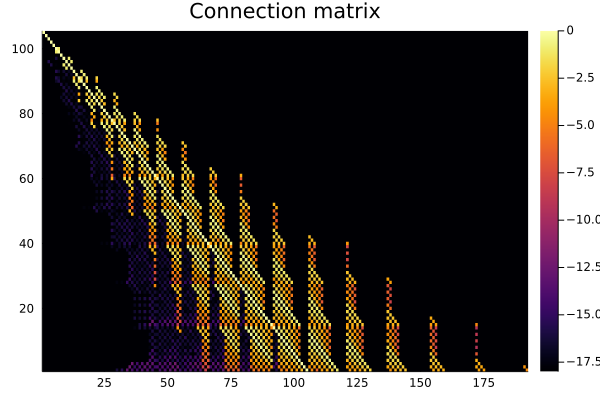

In [173]:
Cp = log10.(abs.(C[1:nk2ind(nmax,nmax),1:Cinds[nk2ind(nmax,nmax),2]]).+1e-18)
heatmap(Cp[end:-1:1,:];title="Connection matrix")

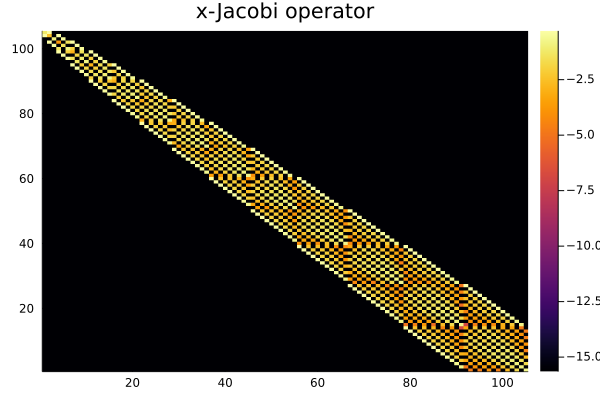

In [174]:
Jxp = log10.(abs.(Matrix(Jx)).+eps())
heatmap(Jxp[end:-1:1,:];title="x-Jacobi operator")

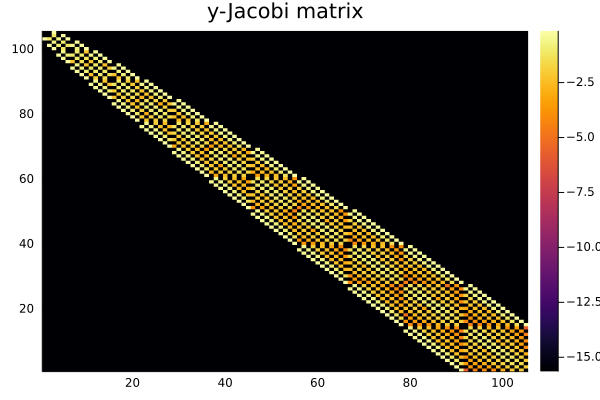

In [175]:
Jyp = log10.(abs.(Matrix(Jy)).+eps())
heatmap(Jyp[end:-1:1,:]; title = "y-Jacobi matrix")

In [20]:
function XP(n,t)
    
    # Generate the operator representing multiplication of the orthonormal polynomials P_{k,j} by x for 0 <= k <= n and 0 <= j <= k
    # The operator is block-tridiagonal with diagonal blocks
    
    l,u = 1,1          # block bandwidths
    rows = 1:n+1
    cols = 1:n+2
    X = BlockBandedMatrix(Zeros{typeof(t)}(sum(rows),sum(cols)), rows,cols, (l,u))
    
    row1 = 1
    row = 1
    for k = 0:n 
        J = jacobimatrix(Normalized(SemiclassicalJacobi((t+1)/2, k+0.5, k+0.5, k+0.5)))
        row = row1
        jr = 1
        for d = k:n-1
            X[row,row] = 2J[jr,jr]-1
            X[row,row+d+1] = X[row+d+1,row] = 2J[jr,jr+1]
            row += d+1
            jr += 1
        end
        X[row,row] = 2J[jr,jr]-1
        X[row,row+n+1] = 2J[jr,jr+1]
        
        row1 += k+2
    end
    
    X

end

XP (generic function with 1 method)

In [27]:
function YP(n,t)
    # Construct the block-pentadiagonal operator representing multiplication of the P_{k,j} by y for 0 <= k <= n, 0 <= j <= k
    
    l,u = 2,2       
    rows = 1:n+1
    cols = 1:n+3
    Y = BlockBandedMatrix(Zeros{typeof(t)}(sum(rows),sum(cols)), rows,cols, (l,u))
    
    # Symmetric Jacobi operator of the orthonormal Legendre polynomials
    Jq = jacobimatrix(Normalized(ClassicalOrthogonalPolynomials.Legendre()))
    
    # First assign the entries for k = 0
    
    k = 0
    # Conversion operator
    Pk = Normalized(SemiclassicalJacobi((t+1)/2, k+0.5, k+0.5, k+0.5))
    Pk1 = Normalized(SemiclassicalJacobi((t+1)/2, k+1.5, k+1.5, k+1.5))
    Rk1 = Pk1\Pk
    
    con2 = 2^(3/2)*Jq[1,2]
    Y[1,3] = Y[3,1] = con2*Rk1[1,1]
    row1 = 1
    row = 1
    row += 1
    for d = 1:n-1
        Y[row,row+1] = Y[row+1,row] = con2*Rk1[d,d+1]
        Y[row,row+d+2] = Y[row+d+2,row] = con2*Rk1[d+1,d+1]
        row += d+1
    end
    # d = n
    Y[row,row+1] = Y[row+1,row] = con2*Rk1[n,n+1]
    Y[row,row+n+2] = con2*Rk1[n+1,n+1]
    
    # Assign entries for k = 1, …, n
    Rk = Zeros(Rk1)
    con1 = 0
    row1 += k+2
    for k = 1:n
        con1 = con2
        Rk = Rk1
        Pk = Pk1
        Pk1 = Normalized(SemiclassicalJacobi((t+1)/2, k+1.5, k+1.5, k+1.5))
        Rk1 = Pk1\Pk
        con2 = 2^(3/2)*Jq[k+1,k+2]
        row = row1
        # Assign first row, d = k = n, d = `degree'
        d = k
        if k <= n-2
            Y[row,row+d] = Y[row+d,row] = con1*Rk[1,3]
            Y[row,row+d+2] = Y[row+d+2,row] = con2*Rk1[1,1]
            Y[row,row+2d+2] = Y[row+2d+2,row] = con1*Rk[1,4]
        elseif k == n-1
            Y[row,row+d] = Y[row+d,row] = con1*Rk[1,3]
            Y[row,row+d+2] = Y[row+d+2,row] = con2*Rk1[1,1]
            Y[row,row+2d+2] = con1*Rk[1,4]
        else
            Y[row,row+d]  = con1*Rk[1,3]
            Y[row,row+d+2] = con2*Rk1[1,1]
            Y[row,row+2d+2] = con1*Rk[1,4]
        end
            row += d+1
        # Assign the remaining rows
        
        for d = k+1:n
            if d <= n-2
                Y[row,row+1] = Y[row+1,row] = con2*Rk1[d-k,d-k+1]
                Y[row,row+d] = Y[row+d,row] = con1*Rk[d-k+1,d-k+3]
                Y[row,row+d+2] = Y[row+d+2,row] = con2*Rk1[d-k+1,d-k+1]
                Y[row,row+2d+2] = Y[row+2d+2,row] = con1*Rk[d-k+1,d-k+4]
            elseif d == n-1
                Y[row,row+1] = Y[row+1,row] = con2*Rk1[d-k,d-k+1]
                Y[row,row+d] = Y[row+d,row] = con1*Rk[d-k+1,d-k+3]
                Y[row,row+d+2] = Y[row+d+2,row] = con2*Rk1[d-k+1,d-k+1]
                Y[row,row+2d+2] = con1*Rk[d-k+1,d-k+4]
            else
                Y[row,row+1] = Y[row+1,row] = con2*Rk1[d-k,d-k+1]
                Y[row,row+d] = con1*Rk[d-k+1,d-k+3]
                Y[row,row+d+2] = con2*Rk1[d-k+1,d-k+1]
                Y[row,row+2d+2]  = con1*Rk[d-k+1,d-k+4]
            end
                
            row += d+1
        end
        
            row1 += k + 2
    end
    
    Y
    
end

YP (generic function with 1 method)

In [31]:
function nk2ind(n,k)
    # Convert the indices (n,k) of a polynomial to a linear index/its index in the vector of polynomials
    if k == n
        out = Int64((n+1)*(n+2)/2)
    else
        out = Int64(n*(n+1)/2)+k+1
    end
    out
end

nk2ind (generic function with 1 method)

In [32]:
function ind2nk(ind)
    # Convert linear index to the ordered degree indices (n,k)
    n1 = (-1+sqrt(1+8ind))/2
    if mod(n1,1) == 0
        out = Int64.([n1-1, n1-1])
    else
        n1 = Int64(floor(n1))
        out = [n1, ind-Int64((n1+1)n1/2)-1]
    end
    out
end

ind2nk (generic function with 1 method)

In [132]:
function LanczosCubic(nmax,b)
    
    d = nk2ind(nmax,nmax)
    # connection matrix
    C = zeros(d,3d) #still have to figure out the column index of the rightmost nonzero entry in a given row
    C[1:5,1:5] = Eye(5)
    # store the leftmost and rightmost nonzero columns of each row of C in Cinds
    Cinds = zeros(Int64,d,2)
    Cinds[1:5,1] = (collect(1:5))
    Cinds[1:5,2] = (collect(1:5))
    # Jacobi operators of the OPs
    l,u = 1,1  
    rows = 1:nmax+1
    cols = 1:nmax+1
    Jx = BlockBandedMatrix(Zeros{typeof(b)}(sum(rows),sum(cols)), rows,cols, (l,u))
    Jy = BlockBandedMatrix(Zeros{typeof(b)}(sum(rows),sum(cols)), rows,cols, (l,u))
    
    # Lanczos for degrees 0, 1, 2, 3 are hard coded
    
    Y = YP(nmax+8,b) #Chose nmax+8 by trial-and-error
    X = XP(nmax+8,b)
   
    # since the first five OPs coincide with the P polynomials,
    A0x = X[Block(1,1)]
    B0x = X[Block(1,2)]
    A0y = Y[Block(1,1)]
    B0y = Y[Block(1,2)]
    A1x = X[Block(2,2)]
    A1y = Y[Block(2,2)]
    B1x = X[Block(2,3)]
    
    # Degree 2
    B1y = zeros(2,3)
    B1y[1,2] = Y[Block(2,3)][1,2]
    B1y[2,1] = Y[Block(2,3)][2,1]
    yQ11 = Y[nk2ind(1,1),1:nk2ind(3,0)]
    yQ11[nk2ind(0,0)] -= B0y[1,2]
    yQ11[nk2ind(1,0)] -= A1y[1,2]
    yQ11[nk2ind(2,0)] -= B1y[2,1]
    B1y[2,3] = sqrt(sum(yQ11.^2))
    C[nk2ind(2,2),1:nk2ind(3,0)] = yQ11/B1y[2,3]
    lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(2,2),1:nk2ind(3,0)])
    Cinds[nk2ind(2,2),:] = [lind, nk2ind(3,0)]
    
    # Degree 3
    A2x = zeros(3,3)
    A2x[1,1] = X[4,4]
    A2x[1,3] = A2x[3,1] = dot(C[4,4]*X[4,6:7],C[6,6:7])
    A2x[2,2] = X[5,5]
    A2x[3,3] = C[6,6:7]'*X[6:7,6:7]*C[6,6:7]
    #C[nk2ind(2,0):nk2ind(2,2),nk2ind(2,0):nk2ind(3,0)]*X[nk2ind(2,0):nk2ind(3,0),nk2ind(2,0):nk2ind(3,0)]*(C[nk2ind(2,0):nk2ind(2,2),nk2ind(2,0):nk2ind(3,0)]')
    B2x = zeros(3,4)
    #cols = [nk2ind(1,0),nk2ind(2,0),nk2ind(3,0)]
    #xQ20 = X[nk2ind(2,0),cols]
    xQ20 = X[nk2ind(2,0),1:nk2ind(3,0)]
    xQ20[nk2ind(1,0)] -= B1x[1,1]
    xQ20[nk2ind(2,0)] -= A2x[1,1]
    xQ20[nk2ind(2,2):nk2ind(3,0)] -= A2x[1,3]*C[nk2ind(2,2),nk2ind(2,2):nk2ind(3,0)]
    B2x[1,1] = sqrt(sum(xQ20.^2))
    C[nk2ind(3,0),1:nk2ind(3,0)] = xQ20/B2x[1,1]
    lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(3,0),1:nk2ind(3,0)])
    Cinds[nk2ind(3,0),:] = [lind nk2ind(3,0)]
    xQ21 = X[nk2ind(2,1),1:nk2ind(3,1)]
    xQ21[nk2ind(1,1)] -= B1x[2,2]
    xQ21[nk2ind(2,1)] -= A2x[2,2]
    B2x[2,2] = sqrt(sum(xQ21.^2))
    C[nk2ind(3,1),1:nk2ind(3,1)] = xQ21/B2x[2,2]
    lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(3,1),1:nk2ind(3,1)])
    Cinds[nk2ind(3,1),:] = [lind nk2ind(3,1)]
    B2x[3,1] = C[nk2ind(2,2),nk2ind(2,2):nk2ind(3,0)]'*X[nk2ind(2,2):nk2ind(3,0),nk2ind(2,2):nk2ind(3,0)]*C[nk2ind(3,0),nk2ind(2,2):nk2ind(3,0)]
    xQ22 = C[nk2ind(2,2),nk2ind(2,2):nk2ind(3,0)]'*X[nk2ind(2,2):nk2ind(3,0),1:nk2ind(4,0)]
    xQ22[nk2ind(2,0)] -= A2x[3,1]
    xQ22[nk2ind(2,2):nk2ind(3,0)] -= A2x[3,3]*C[nk2ind(2,2),nk2ind(2,2):nk2ind(3,0)]
    xQ22[nk2ind(2,2):nk2ind(3,0)] -= B2x[3,1]*C[nk2ind(3,0),nk2ind(2,2):nk2ind(3,0)]
    B2x[3,3] = sqrt(sum(xQ22.^2))
    C[nk2ind(3,2),1:nk2ind(4,0)] = xQ22/B2x[3,3]
    lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(3,2),1:nk2ind(4,0)])
    Cinds[nk2ind(3,2),:] = [lind nk2ind(4,0)]
    A2y = zeros(3,3)
    A2y[1,2] = A2y[2,1] = Y[4,5]
    A2y[2,3] = A2y[3,2] = dot(Y[5,6:7],C[6,6:7])
    B2y = zeros(3,4)
    B2y[1,2] = dot(Y[4,8],C[8,8])
    B2y[2,1] = dot(Y[5,6:7],C[7,6:7])
    B2y[2,3] = dot(Y[5,9:11],C[9,9:11])
    B2y[3,2] = dot(C[6,6:7]'*Y[6:7,8],C[8,8])
    yQ22 = C[6,6:7]'*Y[6:7,3:12]
    yQ22[1] -= B1y[2,3]
    yQ22[3] -= A2y[3,2]
    yQ22[6] -= B2y[3,2]
    B2y[3,4] = sqrt(sum(yQ22.^2))
    C[10,3:12] = yQ22/B2y[3,4]
    lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(3,3),1:nk2ind(4,1)])
    Cinds[nk2ind(3,3),:] = [lind nk2ind(4,1)]
    
    Jx[Block(1,1)] = A0x
    Jx[Block(1,2)] = B0x
    Jx[Block(2,1)] = B0x'
    Jx[Block(2,2)] = A1x
    Jx[Block(2,3)] = B1x
    Jx[Block(3,2)] = B1x'
    Jx[Block(3,3)] = A2x
    Jx[Block(3,4)] = B2x
    Jx[Block(4,3)] = B2x'
    Jy[Block(1,1)] = A0y
    Jy[Block(1,2)] = B0y
    Jy[Block(2,1)] = B0y'
    Jy[Block(2,2)] = A1y
    Jy[Block(2,3)] = B1y
    Jy[Block(3,2)] = B1y'
    Jy[Block(3,3)] = A2y
    Jy[Block(3,4)] = B2y
    Jy[Block(4,3)] = B2y'
    
    tol = 1e-13
    for n = 4:nmax 
        # Compute Ax
        Ax = zeros(n,n)
        # compute the diagonal elements
        for k = 0:n-1
            r = nk2ind(n-1,k)
            Ax[k+1,k+1] = C[r,Cinds[r,1]:Cinds[r,2]]'*X[Cinds[r,1]:Cinds[r,2],Cinds[r,1]:Cinds[r,2]]*C[r,Cinds[r,1]:Cinds[r,2]]
        end
        # off-diagonal elements
        for r = 1:n-2
            row = nk2ind(n-1,r-1)
            for c = r+2:2:n
                Ax[r,c] = Ax[c,r] = C[row,Cinds[row,1]:Cinds[row,2]]'*X[Cinds[row,1]:Cinds[row,2],Cinds[row+c-r,1]:Cinds[row+c-r,2]]*C[row+c-r,Cinds[row+c-r,1]:Cinds[row+c-r,2]] 
            end
        end

        Jx[Block(n,n)] = Ax
        
        # Orthogonalize xQn-1 to form Qₙ₀, …, Qₙ,ₙ₋₁
        Bx = zeros(n,n+1)
        maxind = maximum(Cinds[nk2ind(n-1,0):nk2ind(n-1,n-1),2])
        for k = 0:n-1
            r = nk2ind(n-1,k)
            inds = ind2nk(Cinds[r,2])
            nv = inds[1]
            kv = inds[2]
            rind = nk2ind(nv+1,kv)
            if rind >= maxind
                right = rind
            else
                right = maxind
            end
            # Multiply  by x
            xQn = C[r,Cinds[r,1]:Cinds[r,2]]'*X[Cinds[r,1]:Cinds[r,2],1:right]
            # Subtract off components along lower degree OPs
            # first for OPs of degree n-2
            if k < n-1
                for c = k+1:2:n-1
                    l = nk2ind(n-2,c-1)
                    xQn[Cinds[l,1]:Cinds[l,2]] -= Jx[Block(n,n-1)][k+1,c]*C[l,Cinds[l,1]:Cinds[l,2]]
                end
            end
            # next for OPs of degree n-1
            if mod(k,2)==0
                for c = 1:2:n
                    l = nk2ind(n-1,c-1)
                    xQn[Cinds[l,1]:Cinds[l,2]] -= Jx[Block(n,n)][k+1,c]*C[l,Cinds[l,1]:Cinds[l,2]]
                end
            else
                for c = 2:2:n
                    l = nk2ind(n-1,c-1)
                    xQn[Cinds[l,1]:Cinds[l,2]] -= Jx[Block(n,n)][k+1,c]*C[l,Cinds[l,1]:Cinds[l,2]]
                end
            end
            # Finally OPs of degree n
            if k > 1
               if mod(k,2) == 0
                    for c = 1:2:k-1
                        l = nk2ind(n,c-1)
                        xQn[Cinds[l,1]:Cinds[l,2]] -= Bx[k+1,c]*C[l,Cinds[l,1]:Cinds[l,2]]
                    end
                else
                    for c = 2:2:k-1
                        l = nk2ind(n,c-1)
                        xQn[Cinds[l,1]:Cinds[l,2]] -= Bx[k+1,c]*C[l,Cinds[l,1]:Cinds[l,2]]
                    end
                end
            end
            # Normalise
            Bx[k+1,k+1] = sqrt(sum(xQn.^2))
            C[nk2ind(n,k),1:right] = xQn/Bx[k+1,k+1]
            #C[nk2ind(n,k),1:nk2ind(nv+1,kv)] = xQn/Bx[k+1,k+1]
            # find the leftmost nonzero entry
            #rind = nk2ind(nv+1,kv)
            #lind = findfirst(x-> abs(x)>1e-13,C[nk2ind(n,k),1:rind])
            #Cinds[nk2ind(n,k),:] = [lind rind]
            lind = findfirst(x-> abs(x)>tol,C[nk2ind(n,k),1:right])
            rind = findlast(x-> abs(x)>tol,C[nk2ind(n,k),1:right+1])
            Cinds[nk2ind(n,k),:] = [lind rind]
        
            # Compute the entries in column k+1 of Bx: 
        
            if k < n-2
                for row = k+3:2:n
                    ind = nk2ind(n-1,row-1)
                    Bx[row,k+1] = C[ind,Cinds[ind,1]:Cinds[ind,2]]'*X[Cinds[ind,1]:Cinds[ind,2],lind:rind]*C[nk2ind(n,k),lind:rind]
                end
            end
        end
        Jx[Block(n,n+1)] = Bx
        Jx[Block(n+1,n)] = Bx'
    
        # Compute Ay
        Ay = zeros(n,n)
        for r = 1:n-1
            row = nk2ind(n-1,r-1)
            for c = r+1:2:n
                Ay[r,c] = Ay[c,r] = C[row,Cinds[row,1]:Cinds[row,2]]'*Y[Cinds[row,1]:Cinds[row,2],Cinds[row+c-r,1]:Cinds[row+c-r,2]]*C[row+c-r,Cinds[row+c-r,1]:Cinds[row+c-r,2]] 
            end
        end
        Jy[Block(n,n)] = Ay
    
        # Compute By column by column
        By = zeros(n,n+1)
        ind = nk2ind(n,0)
        # first column
        for r = 2:2:n
            l = nk2ind(n-1,r-1)
            By[r,1] = C[l,Cinds[l,1]:Cinds[l,2]]'*Y[Cinds[l,1]:Cinds[l,2],Cinds[ind,1]:Cinds[ind,2]]*C[ind,Cinds[ind,1]:Cinds[ind,2]]
        end
        # rest of the columns
        for c = 2:n
            ind = nk2ind(n,c-1)
            for r = c-1:2:n
                l = nk2ind(n-1,r-1)
                By[r,c] = C[l,Cinds[l,1]:Cinds[l,2]]'*Y[Cinds[l,1]:Cinds[l,2],Cinds[ind,1]:Cinds[ind,2]]*C[ind,Cinds[ind,1]:Cinds[ind,2]]
            end        
        end
        # orthogonalize yQ_{n-1,n-1} to find Q_{n,n}
        # Multiply Q_{n-1,n-1} by y
        r = nk2ind(n-1,n-1)
        inds = ind2nk(Cinds[r,2])
        nv = inds[1]
        kv = inds[2]
        yQn = C[r,Cinds[r,1]:Cinds[r,2]]'*Y[Cinds[r,1]:Cinds[r,2],1:nk2ind(nv+2,kv-1)]
        # subtract off OPs of degree n-2
        l = nk2ind(n-2,n-2)
        yQn[Cinds[l,1]:Cinds[l,2]] -= Jy[Block(n,n-1)][n,n-1]*C[l,Cinds[l,1]:Cinds[l,2]]
        # subtract off OPs of degree n-1
        if mod(n,2)==0
            for c = 1:2:n
                l = nk2ind(n-1,c-1)
                yQn[Cinds[l,1]:Cinds[l,2]] -= Jy[Block(n,n)][n,c]*C[l,Cinds[l,1]:Cinds[l,2]]
            end
        else
            for c = 2:2:n
                l = nk2ind(n-1,c-1)
                yQn[Cinds[l,1]:Cinds[l,2]] -= Jy[Block(n,n)][n,c]*C[l,Cinds[l,1]:Cinds[l,2]]
            end
        end
        # subtract off OPs of degree n
        if mod(n,2)==0
            for c = 1:2:n-1
                l = nk2ind(n,c-1)
                yQn[Cinds[l,1]:Cinds[l,2]] -= By[n,c]*C[l,Cinds[l,1]:Cinds[l,2]]
            end
        else
            for c = 2:2:n-1
                l = nk2ind(n,c-1)
                yQn[Cinds[l,1]:Cinds[l,2]] -= By[n,c]*C[l,Cinds[l,1]:Cinds[l,2]]
            end
        end
    
        # normalise
        By[n,n+1] = sqrt(sum(yQn.^2))
    
        C[nk2ind(n,n),1:nk2ind(nv+2,kv-1)] = yQn/By[n,n+1]
        # find the leftmost nonzero entry
        rind = findlast(x-> abs(x)>tol,C[nk2ind(n,n),1:nk2ind(nv+2,kv-1)+1])
        #rind = nk2ind(nv+2,kv-1)
        lind = findfirst(x-> abs(x)>tol,C[nk2ind(n,n),1:rind])
        Cinds[nk2ind(n,n),:] = [lind rind]
        Jy[Block(n,n+1)] = By
        Jy[Block(n+1,n)] = By'
    end
    
    Ax = zeros(nmax+1,nmax+1)
    # compute the diagonal elements
    for k = 0:nmax
        r = nk2ind(nmax,k)
        Ax[k+1,k+1] = C[r,Cinds[r,1]:Cinds[r,2]]'*X[Cinds[r,1]:Cinds[r,2],Cinds[r,1]:Cinds[r,2]]*C[r,Cinds[r,1]:Cinds[r,2]]
    end
    # off-diagonal elements
    for r = 1:nmax-1
        row = nk2ind(nmax,r-1)
        for c = r+2:2:nmax+1
            Ax[r,c] = Ax[c,r] = C[row,Cinds[row,1]:Cinds[row,2]]'*X[Cinds[row,1]:Cinds[row,2],Cinds[row+c-r,1]:Cinds[row+c-r,2]]*C[row+c-r,Cinds[row+c-r,1]:Cinds[row+c-r,2]] 
        end
    end

    Jx[Block(nmax+1,nmax+1)] = Ax
    
    Ay = zeros(nmax+1,nmax+1)
    for r = 1:nmax
        row = nk2ind(nmax,r-1)
        for c = r+1:2:nmax+1
            Ay[r,c] = Ay[c,r] = C[row,Cinds[row,1]:Cinds[row,2]]'*Y[Cinds[row,1]:Cinds[row,2],Cinds[row+c-r,1]:Cinds[row+c-r,2]]*C[row+c-r,Cinds[row+c-r,1]:Cinds[row+c-r,2]] 
        end
    end
    Jy[Block(nmax+1,nmax+1)] = Ay
    
    C, Jx, Jy, Cinds
end

LanczosCubic (generic function with 1 method)